<a href="https://colab.research.google.com/github/Bamidels/Coronary-Heart-Disease-Predictive-Modeling/blob/main/CHD_DeepNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
# Data Loading and Numerical Operations
import pandas as pd
import numpy as np
# Data Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Data Resampling
from sklearn.utils import resample
# Data Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Data Splitting
from sklearn.model_selection import train_test_split
# Data Scaling
from sklearn.preprocessing import MinMaxScaler
# Data Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report
# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
# Ensembling
#from mlxtend.classifier import StackingCVClassifier

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/framingham.csv')

In [ ]:
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [ ]:
data.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [ ]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
print((data['glucose'].mode()))

0    75.0
Name: glucose, dtype: float64


In [ ]:
data["glucose"].fillna((data["glucose"].mode())[0], inplace=True)

In [ ]:
data.dropna(inplace=True)
data.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [ ]:
data = data[data['totChol']<600.0]
data = data[data['sysBP']<295.0]
data.shape

(3987, 16)

In [ ]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000
mean,0.433409,49.469526,1.982694,0.491347,9.027840,0.029345,0.005518,0.309255,0.025082,236.502132,132.177452,82.849887,25.769488,75.869325,81.272385,0.148733
std,0.495608,8.531325,1.020832,0.499988,11.918332,0.168794,0.074087,0.462244,0.156392,43.653337,21.793408,11.854644,4.075145,12.086398,22.954842,0.355870
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.060000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,77.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,143.000000,89.500000,27.990000,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,464.000000,248.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
categorical_features = ['male', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']

In [ ]:
for feature in categorical_features:
    print(feature,':')
    print(data[feature].value_counts())
    print("-----------------")

male :
0    2259
1    1728
Name: male, dtype: int64
-----------------
education :
1.0    1653
2.0    1209
3.0     666
4.0     459
Name: education, dtype: int64
-----------------
currentSmoker :
0    2028
1    1959
Name: currentSmoker, dtype: int64
-----------------
BPMeds :
0.0    3870
1.0     117
Name: BPMeds, dtype: int64
-----------------
prevalentStroke :
0    3965
1      22
Name: prevalentStroke, dtype: int64
-----------------
prevalentHyp :
0    2754
1    1233
Name: prevalentHyp, dtype: int64
-----------------
diabetes :
0    3887
1     100
Name: diabetes, dtype: int64
-----------------


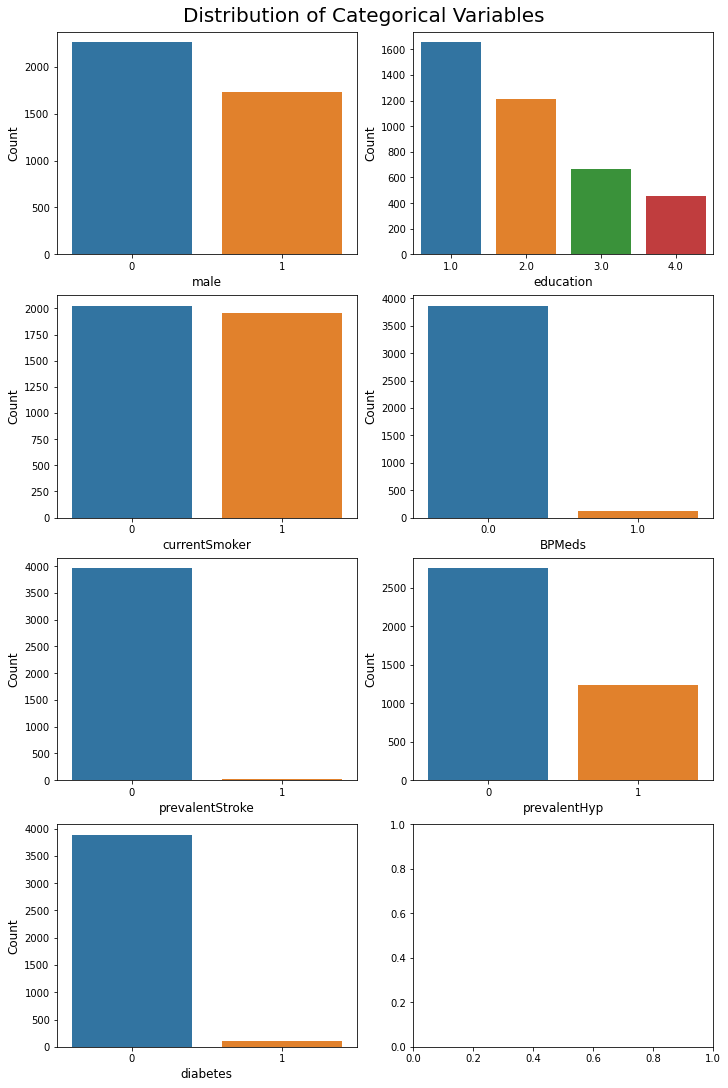

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

num_plots = len(categorical_features)
total_cols = 2
total_rows = num_plots // total_cols + 1
fig, axs = plt.subplots(
    nrows=total_rows, ncols=total_cols, figsize=(10, 15), facecolor='w', constrained_layout=True
)

plt.suptitle('Distribution of Categorical Variables', fontsize=20)

for i, var in enumerate(categorical_features):
    row = i // total_cols
    pos = i % total_cols
    plot = sns.countplot(x=var, data=data, ax=axs[row][pos])
    plot.set_xlabel(var, fontsize=12)
    plot.set_ylabel('Count', fontsize=12)
    plot.tick_params(labelsize=10)


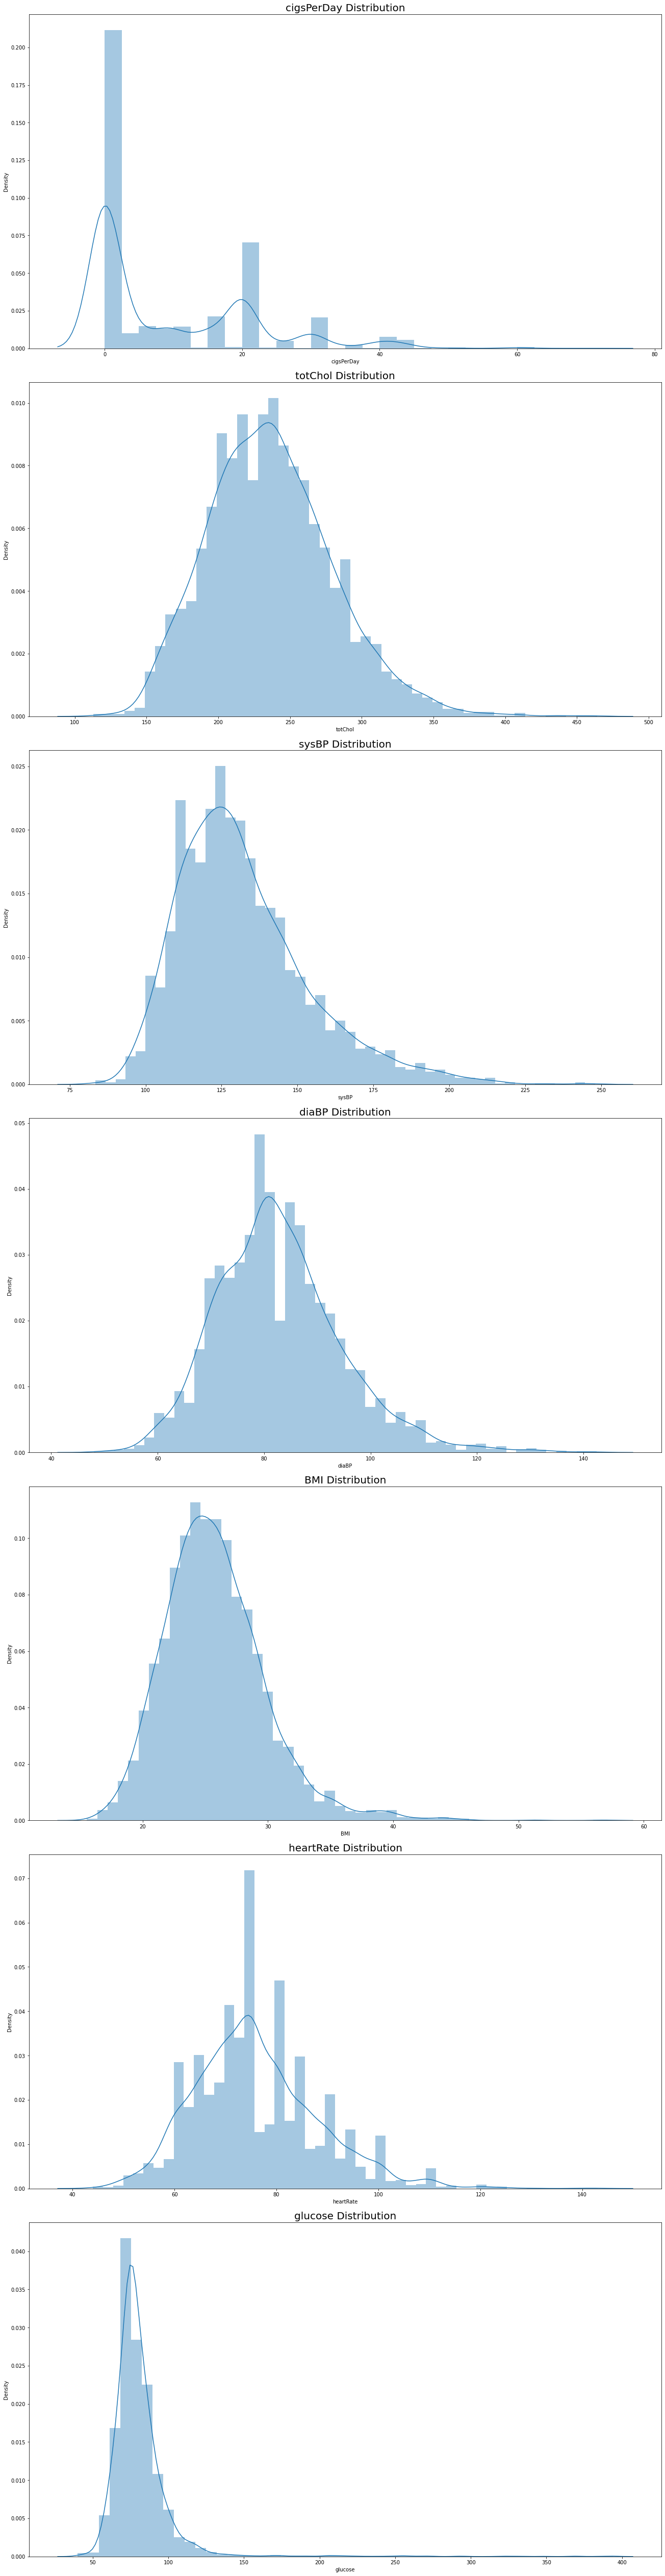

In [ ]:
import warnings
warnings.filterwarnings('ignore')

numeric_features = ['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

fig, axs = plt.subplots(nrows=len(numeric_features), figsize=(18, 10*len(numeric_features)), facecolor='w', constrained_layout=True)

for i, feature in enumerate(numeric_features):
    sns.distplot(data[feature], ax=axs[i])
    axs[i].set_title('{} Distribution'.format(feature), fontsize=20)
    
plt.show()


In [ ]:
target1=data[data['TenYearCHD']==1]
target0=data[data['TenYearCHD']==0]

In [ ]:
target1=resample(target1,replace=True,n_samples=len(target0),random_state=40)
target=pd.concat([target0,target1])
target['TenYearCHD'].value_counts()
data=target
np.shape(data)

(6788, 16)

In [ ]:
#To idenfify the features that have larger contribution towards the outcome variable, TenYearCHD
X=data.iloc[:,0:15]
y=data.iloc[:,-1]
print("X - ", X.shape, "\ny - ", y.shape)

X -  (6788, 15) 
y -  (6788,)


In [ ]:
#We can apply SelectKBest and extract top 10 features
best=SelectKBest(score_func=chi2, k=10)

In [ ]:
fit=best.fit(X,y)

In [ ]:
data_scores=pd.DataFrame(fit.scores_)
data_columns=pd.DataFrame(X.columns)

In [ ]:
#Join the two dataframes
scores=pd.concat([data_columns,data_scores],axis=1)
scores.columns=['Feature','Score']
print(scores.nlargest(11,'Score'))

         Feature        Score
10         sysBP  2121.922128
14       glucose  1232.342416
1            age  1006.482991
4     cigsPerDay   788.788750
9        totChol   769.066248
11         diaBP   486.662514
7   prevalentHyp   221.104823
0           male    66.775610
5         BPMeds    66.216216
8       diabetes    54.258065
12           BMI    44.717502


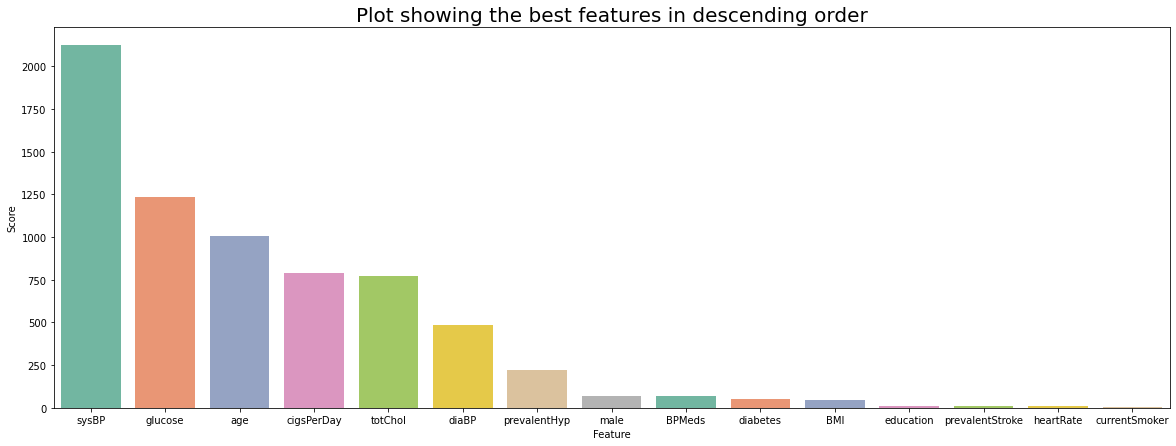

In [ ]:
#To visualize feature selection
scores=scores.sort_values(by="Score", ascending=False)
plt.figure(figsize=(20,7), facecolor='w')
sns.barplot(x='Feature',y='Score',data=scores,palette='Set2')
plt.title("Plot showing the best features in descending order", size=20)
plt.show()


In [ ]:
#Select 10 features
features=scores["Feature"].tolist()[:10]
features

['sysBP',
 'glucose',
 'age',
 'cigsPerDay',
 'totChol',
 'diaBP',
 'prevalentHyp',
 'male',
 'BPMeds',
 'diabetes']

In [ ]:
data=data[['sysBP','glucose','age','cigsPerDay','totChol','diaBP','prevalentHyp','male','BPMeds','diabetes','TenYearCHD']]
data.head()

,sysBP,glucose,age,cigsPerDay,totChol,diaBP,prevalentHyp,male,BPMeds,diabetes,TenYearCHD
0,106.0,77.0,39,0.0,195.0,70.0,0,1,0.0,0,0
1,121.0,76.0,46,0.0,250.0,81.0,0,0,0.0,0,0
2,127.5,70.0,48,20.0,245.0,80.0,0,1,0.0,0,0
4,130.0,85.0,46,23.0,285.0,84.0,0,0,0.0,0,0
5,180.0,99.0,43,0.0,228.0,110.0,1,0,0.0,0,0


In [ ]:
y = data['TenYearCHD']
X = data.drop(['TenYearCHD'], axis=1)
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

In [ ]:
#Define CNN architecture
model = tf.keras.Sequential([
tf.keras.layers.Reshape((10, 1), input_shape=(10,)),
tf.keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu'),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.MaxPooling1D(pool_size=2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(64, activation='relu'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(1, activation='sigmoid')
])



In [ ]:
#Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#We train the model:
#Fit model to training data
model.fit(train_x, train_y, epochs=50, batch_size=64, validation_split=0.2)

Epoch 1/50
60/60 [==============================] - 3s 14ms/step - loss: 0.6336 - accuracy: 0.6508 - val_loss: 0.6824 - val_accuracy: 0.6446
Epoch 2/50
60/60 [==============================] - 0s 7ms/step - loss: 0.6105 - accuracy: 0.6632 - val_loss: 0.6736 - val_accuracy: 0.6646
Epoch 3/50
60/60 [==============================] - 0s 7ms/step - loss: 0.6045 - accuracy: 0.6697 - val_loss: 0.6654 - val_accuracy: 0.6593
Epoch 4/50
60/60 [==============================] - 0s 7ms/step - loss: 0.6010 - accuracy: 0.6761 - val_loss: 0.6576 - val_accuracy: 0.6646
Epoch 5/50
60/60 [==============================] - 0s 7ms/step - loss: 0.6006 - accuracy: 0.6742 - val_loss: 0.6473 - val_accuracy: 0.6930
Epoch 6/50
60/60 [==============================] - 0s 7ms/step - loss: 0.5948 - accuracy: 0.6763 - val_loss: 0.6334 - val_accuracy: 0.6845
Epoch 7/50
60/60 [==============================] - 0s 5ms/step - loss: 0.5927 - accuracy: 0.6821 - val_loss: 0.6271 - val_accuracy: 0.6835
Epoch 8/50
60/60 [=

In [ ]:
# Predict on testing data
pred_prob_y = model.predict(test_x)
pred_y = np.round(pred_prob_y)


64/64 [==============================] - 0s 3ms/step


In [ ]:
#Evaluate model
acc = accuracy_score(test_y, pred_y)
prec = precision_score(test_y, pred_y)
rec = recall_score(test_y, pred_y)
f1 = f1_score(test_y, pred_y)
cm = confusion_matrix(test_y, pred_y)
print(f"Accuracy: {acc}")
print(f"Precision: {prec}")
print(f"Recall: {rec}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{cm}")

Accuracy: 0.7005400098183603
Precision: 0.7016361886429259
Recall: 0.7084548104956269
F1 Score: 0.7050290135396519
Confusion Matrix:
[[698 310]
 [300 729]]


RNN MODEL 

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler


# Define RNN architecture
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=32, activation='tanh', input_shape=(10, 1)),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
model.fit(train_x.reshape(-1, 10, 1), train_y, epochs=50, batch_size=64, validation_split=0.2)

# Predict on testing data
pred_prob_y = model.predict(test_x.reshape(-1, 10, 1))
pred_y = np.round(pred_prob_y)

# Evaluate model
acc = accuracy_score(test_y, pred_y)
prec = precision_score(test_y, pred_y)
rec = recall_score(test_y, pred_y)
f1 = f1_score(test_y, pred_y)
cm = confusion_matrix(test_y, pred_y)
print(f"Accuracy: {acc}")
print(f"Precision: {prec}")
print(f"Recall: {rec}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{cm}")


Epoch 1/50
60/60 [==============================] - 4s 14ms/step - loss: 0.6550 - accuracy: 0.6084 - val_loss: 0.6028 - val_accuracy: 0.6677
Epoch 2/50
60/60 [==============================] - 0s 6ms/step - loss: 0.6184 - accuracy: 0.6647 - val_loss: 0.5975 - val_accuracy: 0.6740
Epoch 3/50
60/60 [==============================] - 0s 6ms/step - loss: 0.6093 - accuracy: 0.6745 - val_loss: 0.5948 - val_accuracy: 0.6751
Epoch 4/50
60/60 [==============================] - 0s 5ms/step - loss: 0.6088 - accuracy: 0.6705 - val_loss: 0.6024 - val_accuracy: 0.6698
Epoch 5/50
60/60 [==============================] - 0s 6ms/step - loss: 0.6082 - accuracy: 0.6766 - val_loss: 0.5966 - val_accuracy: 0.6793
Epoch 6/50
60/60 [==============================] - 1s 9ms/step - loss: 0.6075 - accuracy: 0.6739 - val_loss: 0.5999 - val_accuracy: 0.6772
Epoch 7/50
60/60 [==============================] - 1s 12ms/step - loss: 0.6098 - accuracy: 0.6726 - val_loss: 0.5990 - val_accuracy: 0.6793
Epoch 8/50
60/60 [

Improving on the RNN model by improving on the hyper parameters

we added two LSTM layers to the RNN model. LSTMs are a type of recurrent neural network layer that can help the model better capture long-term dependencies in the data. We also increased the number of neurons in the dense layer to 128 and reduced the dropout rate to 0.1. Finally, we decreased the learning rate of the optimizer to 0.0001 to potentially help the model converge to a better solution. All of these changes were made with the aim of improving the model's performance.

In [ ]:
# Defining and improving on the RNN architecture
model = tf.keras.Sequential([
    tf.keras.layers.Reshape((10, 1), input_shape=(10,)),
    tf.keras.layers.LSTM(64, activation='relu', return_sequences=True),
    tf.keras.layers.LSTM(32, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile model with custom learning rate
adam = tf.keras.optimizers.Adam(lr=0.0001)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

# Train the model with a validation split of 0.2
history = model.fit(train_x, train_y, epochs=50, batch_size=64, validation_split=0.2)

# Predict on testing data
pred_prob_y = model.predict(test_x)
pred_y = np.round(pred_prob_y)

# Evaluate model
acc = accuracy_score(test_y, pred_y)
prec = precision_score(test_y, pred_y)
rec = recall_score(test_y, pred_y)
f1 = f1_score(test_y, pred_y)
cm = confusion_matrix(test_y, pred_y)

print(f"Accuracy: {acc}")
print(f"Precision: {prec}")
print(f"Recall: {rec}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{cm}")


Epoch 1/50
60/60 [==============================] - 7s 36ms/step - loss: 0.6711 - accuracy: 0.5876 - val_loss: 0.6286 - val_accuracy: 0.6583
Epoch 2/50
60/60 [==============================] - 1s 18ms/step - loss: 0.6393 - accuracy: 0.6461 - val_loss: 0.6183 - val_accuracy: 0.6614
Epoch 3/50
60/60 [==============================] - 1s 19ms/step - loss: 0.6246 - accuracy: 0.6482 - val_loss: 0.6070 - val_accuracy: 0.6614
Epoch 4/50
60/60 [==============================] - 2s 39ms/step - loss: 0.6239 - accuracy: 0.6571 - val_loss: 0.6323 - val_accuracy: 0.6278
Epoch 5/50
60/60 [==============================] - 3s 47ms/step - loss: 0.6237 - accuracy: 0.6608 - val_loss: 0.6005 - val_accuracy: 0.6856
Epoch 6/50
60/60 [==============================] - 1s 20ms/step - loss: 0.6181 - accuracy: 0.6642 - val_loss: 0.6057 - val_accuracy: 0.6698
Epoch 7/50
60/60 [==============================] - 1s 24ms/step - loss: 0.6169 - accuracy: 0.6621 - val_loss: 0.6010 - val_accuracy: 0.6845
Epoch 8/50
60

LSTM MODEL 

We are performing this LSTM model because it is a type of recurrent neural network that is particularly good at processing sequential data, such as time series or text data. In the case of the CHD prediction, we can consider each patient's health data as a sequence, where the order of measurements matters. LSTM can learn long-term dependencies between the different measurements and can capture patterns and trends in the data that might not be easily captured by other models.

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler

# Define LSTM architecture
model_lstm = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=64, activation='tanh', input_shape=(10, 1)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

# Compile model
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
model_lstm.fit(train_x.reshape(-1, 10, 1), train_y, epochs=50, batch_size=64, validation_split=0.2)

# Predict on testing data
pred_prob_y = model_lstm.predict(test_x.reshape(-1, 10, 1))
pred_y = np.round(pred_prob_y)

# Evaluate model
acc = accuracy_score(test_y, pred_y)
prec = precision_score(test_y, pred_y)
rec = recall_score(test_y, pred_y)
f1 = f1_score(test_y, pred_y)
cm = confusion_matrix(test_y, pred_y)
print(f"Accuracy: {acc}")
print(f"Precision: {prec}")
print(f"Recall: {rec}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{cm}")


Epoch 1/50
60/60 [==============================] - 5s 25ms/step - loss: 0.6813 - accuracy: 0.5447 - val_loss: 0.6454 - val_accuracy: 0.6309
Epoch 2/50
60/60 [==============================] - 1s 11ms/step - loss: 0.6281 - accuracy: 0.6521 - val_loss: 0.6043 - val_accuracy: 0.6635
Epoch 3/50
60/60 [==============================] - 1s 12ms/step - loss: 0.6194 - accuracy: 0.6600 - val_loss: 0.6011 - val_accuracy: 0.6761
Epoch 4/50
60/60 [==============================] - 1s 11ms/step - loss: 0.6216 - accuracy: 0.6547 - val_loss: 0.6031 - val_accuracy: 0.6698
Epoch 5/50
60/60 [==============================] - 1s 12ms/step - loss: 0.6207 - accuracy: 0.6616 - val_loss: 0.6093 - val_accuracy: 0.6614
Epoch 6/50
60/60 [==============================] - 1s 11ms/step - loss: 0.6178 - accuracy: 0.6624 - val_loss: 0.6091 - val_accuracy: 0.6656
Epoch 7/50
60/60 [==============================] - 1s 12ms/step - loss: 0.6189 - accuracy: 0.6576 - val_loss: 0.6036 - val_accuracy: 0.6740
Epoch 8/50
60

LSTM Hyper parameter Tunning

we added a second LSTM layer with fewer units and added the return_sequences=True argument to the first LSTM layer to pass the output sequence from the first LSTM layer to the second one. We also increased the number of epochs to 100 to allow for more training

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

# Reshape data for LSTM model
train_x = train_x.reshape(-1, 10, 1)
test_x = test_x.reshape(-1, 10, 1)

# Define LSTM architecture
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=32, activation='tanh', input_shape=(10, 1), return_sequences=True),
    tf.keras.layers.LSTM(units=16, activation='tanh', return_sequences=False),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
model.fit(train_x, train_y, epochs=100, batch_size=64, validation_split=0.2)

# Predict on testing data
pred_prob_y = model.predict(test_x)
pred_y = np.round(pred_prob_y)

# Evaluate model
acc = accuracy_score(test_y, pred_y)
prec = precision_score(test_y, pred_y)
rec = recall_score(test_y, pred_y)
f1 = f1_score(test_y, pred_y)
cm = confusion_matrix(test_y, pred_y)
print(f"Accuracy: {acc}")
print(f"Precision: {prec}")
print(f"Recall: {rec}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{cm}")


Epoch 1/100
60/60 [==============================] - 7s 40ms/step - loss: 0.6776 - accuracy: 0.5518 - val_loss: 0.6444 - val_accuracy: 0.6866
Epoch 2/100
60/60 [==============================] - 1s 24ms/step - loss: 0.6248 - accuracy: 0.6574 - val_loss: 0.6031 - val_accuracy: 0.6635
Epoch 3/100
60/60 [==============================] - 1s 24ms/step - loss: 0.6229 - accuracy: 0.6518 - val_loss: 0.6026 - val_accuracy: 0.6793
Epoch 4/100
60/60 [==============================] - 1s 23ms/step - loss: 0.6208 - accuracy: 0.6587 - val_loss: 0.6016 - val_accuracy: 0.6919
Epoch 5/100
60/60 [==============================] - 1s 16ms/step - loss: 0.6179 - accuracy: 0.6600 - val_loss: 0.6032 - val_accuracy: 0.6877
Epoch 6/100
60/60 [==============================] - 1s 16ms/step - loss: 0.6173 - accuracy: 0.6634 - val_loss: 0.6021 - val_accuracy: 0.6930
Epoch 7/100
60/60 [==============================] - 1s 15ms/step - loss: 0.6167 - accuracy: 0.6618 - val_loss: 0.6046 - val_accuracy: 0.6677
Epoch 